In [155]:
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import config
import sys
import jsonpickle
import os


In [156]:
txli =['Tesla is hardcore',
        'Tesla is hardcore',
        'Car talk with Tesla',
        'The lawyers who did nothing but damage Tesla want $6 billion. Criminal.',
        'Tonight, we radically increased the design goals for the new Tesla Roadster.\n\nThere will never be another car like this, if you could even call it a car.',
        'Tesla Model Y receives highest possible safety rating',
        'Tesla Cybertruck, the finest in apocalypse defense technology!',
        'Congrats Tesla Team!',
        'This is how we create Tesla products',
        'Congratulations Tesla team on a great year!!',
        'Next week, I will do a company talk for SpaceX, followed later by a company talk for Tesla after the 10K. \n\nI will recap the talented team’s amazing accomplishments of 2023 and describe exciting plans for 2024 and beyond!\n\nThese will be posted publicly to @SpaceX and @Tesla.',
        'Rainbow as seen from Tesla Palo Alto',
        'Tesla has by far the best real-world AI',
        'Massive congrats to the incredible Tesla team, from design through to manufacturing, for making Cybertruck real! I love you.',
        'Cybertrucks are on their way to Tesla stores in North America!',
        'If you want to try a Tesla for a few days, you can rent one @Hertz',
        'All design & engineering of the original @Tesla Roadster is now fully open source.\n\nWhatever we have, you now have.',
        'All Tesla Superchargers in Israel are free',
        'New Tesla safety feature uploaded via over the air software update. \n\nYour car just got better while you slept.',
        'Tesla audio engineering',
        'Btw, your Tesla can protect you from a bioweapon attack',
        'Tesla Model S & Model X have hospital-grade HEPA air filters, protecting you from dust, bacteria, pollen (allergies), spores & many toxic gases',
        'Congrats Tesla Plaid racing team!',
        'Congratulations to Giga Shanghai & Tesla China SDS teams for their excellent work overcoming many obstacles over many years!!',
        'Tesla shareholder meeting underway',
        'Tesla Powerwall does the seem for individual homes (if you have the backup switch installed)\nhttp://Tesla.com/Powerwall',
        'Congratulations Tesla Texas Team!!',
        'Tesla opening Megapack factory in Shanghai to supplement output of Megapack factory in California',
        'Big congratulations to the Tesla Germany team!!',
        'Great work by Tesla Team!',
        'Thread on how safe Tesla cars are',
        'Congratulations Tesla Team!!',
        'Tesla Semi Truck launch in 5 mins!',
        'Tesla team just completed a 500 mile drive with a Tesla Semi weighing in at 81,000 lbs!',
        'Tesla Full Self-Driving Beta is now available to anyone in North America who requests it from the car screen, assuming you have bought this option. \n\nCongrats to Tesla Autopilot/AI team on achieving a major milestone!',
        'Tesla Megapacks are highly effective in addressing electricity demand spikes that cause power outages',
        'Tesla FSD 10.69.3.1 going to wide release now',
        'In case you missed Tesla AI Day 2022',
        'Excited to announce start of production of Tesla Semi Truck with deliveries to @Pepsi on Dec 1st!',
        'Recording of Tesla AI Day 2022',
        'The point of AI Day is to show the immense depth & breadth of Tesla in AI, compute hardware & robotics',
        'Tesla AI Day 2022 starts at precisely 6:15pm California time',
        'Last coal shipment arrived in Hawaii at same time as Tesla Megapack batteries that will enable 24/7 sustainable energy',
        'Tesla North America aiming for >50% same hour service',
        'Order a Tesla Powerwall battery for blackout protection!',
        'FSD Beta 10.69 started rolling out to Tesla owners last night. This build is a big step forward!\n\n10.69.1 probably end of week with wider release.\n\n1069.2 in a few weeks should be good enough to provide to all FSD Beta participants.',
        'Tesla + Twitter -> Twizzler',
        'Try voice command “open butthole” on your Tesla',
        'Tesla + Twitter -> Twizzler',
        'Try voice command “open butthole” on your Tesla',
        'Excited to work with Tesla Service to enable same-hour service as often as possible! Applying Formula 1 pit crew techniques to Teslas.',
        'Congrats to Tesla Fremont + Giga Nevada for making their 2 millionth car!',
        'Please vote your shares with Tesla!',
        'Tesla is to protect life on Earth,\nSpaceX to extend life beyond.',
        'Tesla’s automatic cabin overheat protection should make a real difference with record heatwaves.\n\nAbility to adjust activation temperature coming with next software release.',
        'Super fired up for future product development with our awesome Tesla team! Such an honor to work with them.',
        'Maybe Tesla should make a highly configurable Robovan for people & cargo?',
        'Working on Tesla North American service. \n\nGoal is 2/3 of cars receive same-day service, no wait.',
        'Tesla AI Day pushed to Sept 30, as we may have an Optimus prototype working by then',
        'Tesla scores 100/100 for 7th year in a row for LGBTQ equality',
        'Tesla Plaid S cruising around Austin with volume at 11 is sublime',
        'Tesla merch can be bought with Doge, soon SpaceX merch too',
        'Tesla is building a hardcore litigation department where we directly initiate & execute lawsuits. The team will report directly to me. \n\nPlease send 3 to 5 bullet points describing evidence of exceptional ability.\n\njustice@tesla.com',
        'To be clear, I’m spending <5% (but actually) of my time on the Twitter acquisition. It ain’t rocket science!\n\nYesterday was Giga Texas, today is Starbase. Tesla is on my mind 24/7.\n\nSo may seem like below, but not true.',
        'Despite Tesla doing more for the environment than any company ever!',
        'Exxon is rated top ten best in world for environment, social & governance (ESG) by S&P 500, while Tesla didn’t make the list!\n\nESG is a scam. It has been weaponized by phony social justice warriors.',
        'Tesla AI Day #2 on Aug 19. So many cool updates!',
        'Such a joy to work with amazingly talented people at SpaceX, Tesla, Neuralink & Boring Co!']

In [157]:
from nltk.tokenize import word_tokenize 

In [158]:
tk_list = []
for sentence in txli:
    tk_list.append(word_tokenize(sentence))
 
tk_list

[['Tesla', 'is', 'hardcore'],
 ['Tesla', 'is', 'hardcore'],
 ['Car', 'talk', 'with', 'Tesla'],
 ['The',
  'lawyers',
  'who',
  'did',
  'nothing',
  'but',
  'damage',
  'Tesla',
  'want',
  '$',
  '6',
  'billion',
  '.',
  'Criminal',
  '.'],
 ['Tonight',
  ',',
  'we',
  'radically',
  'increased',
  'the',
  'design',
  'goals',
  'for',
  'the',
  'new',
  'Tesla',
  'Roadster',
  '.',
  'There',
  'will',
  'never',
  'be',
  'another',
  'car',
  'like',
  'this',
  ',',
  'if',
  'you',
  'could',
  'even',
  'call',
  'it',
  'a',
  'car',
  '.'],
 ['Tesla',
  'Model',
  'Y',
  'receives',
  'highest',
  'possible',
  'safety',
  'rating'],
 ['Tesla',
  'Cybertruck',
  ',',
  'the',
  'finest',
  'in',
  'apocalypse',
  'defense',
  'technology',
  '!'],
 ['Congrats', 'Tesla', 'Team', '!'],
 ['This', 'is', 'how', 'we', 'create', 'Tesla', 'products'],
 ['Congratulations', 'Tesla', 'team', 'on', 'a', 'great', 'year', '!', '!'],
 ['Next',
  'week',
  ',',
  'I',
  'will',
  'do'

In [159]:
# allWords = ' '.join([twts for twts in txli])
# allWordss = allWords.split(' ')
# word_counts = pd.Series(allWordss).value_counts()

# # 데이터프레임으로 변환
# df = pd.DataFrame({'Word': word_counts.index, 'Count': word_counts.values})

# # 결과 출력
# print(df)

                                       Word  Count
0                                     Tesla     66
1                                        to     29
2                                         a     19
3                                       the     17
4                                       for     17
..                                      ...    ...
515                                   Texas      1
516  installed)\nhttp://Tesla.com/Powerwall      1
517                                  switch      1
518                                  backup      1
519                                     Co!      1

[520 rows x 2 columns]


In [184]:
import string
from nltk.corpus import stopwords
stop_words = set(stopwords.words())
result_list = []

for tk_list_list in tk_list: # [[]] to []
    result = [] 
    for word in tk_list_list: # list to word arg
        
        if word not in stop_words and word not in string.punctuation:   #구두점제거
                  
            result.append(word)
    result_list.append(result)
print(result_list) # 불용어(스탑워드) 제거

[['Tesla', 'hardcore'], ['Tesla', 'hardcore'], ['Car', 'talk', 'Tesla'], ['The', 'lawyers', 'damage', 'Tesla', '6', 'billion', 'Criminal'], ['Tonight', 'radically', 'increased', 'design', 'goals', 'Tesla', 'Roadster', 'There', 'car', 'call', 'car'], ['Tesla', 'Model', 'Y', 'receives', 'highest', 'possible', 'safety', 'rating'], ['Tesla', 'Cybertruck', 'finest', 'apocalypse', 'defense', 'technology'], ['Congrats', 'Tesla', 'Team'], ['This', 'create', 'Tesla', 'products'], ['Congratulations', 'Tesla', 'team', 'great', 'year'], ['Next', 'week', 'I', 'company', 'talk', 'SpaceX', 'company', 'talk', 'Tesla', '10K', 'I', 'recap', 'talented', 'team', '’', 'amazing', 'accomplishments', '2023', 'describe', 'exciting', 'plans', '2024', 'These', 'posted', 'publicly', 'SpaceX', 'Tesla'], ['Rainbow', 'Tesla', 'Palo', 'Alto'], ['Tesla', 'real-world', 'AI'], ['Massive', 'congrats', 'incredible', 'Tesla', 'team', 'design', 'manufacturing', 'making', 'Cybertruck', 'real', 'I', 'love'], ['Cybertrucks', '

In [186]:
result_list

[['Tesla', 'hardcore'],
 ['Tesla', 'hardcore'],
 ['Car', 'talk', 'Tesla'],
 ['The', 'lawyers', 'damage', 'Tesla', '6', 'billion', 'Criminal'],
 ['Tonight',
  'radically',
  'increased',
  'design',
  'goals',
  'Tesla',
  'Roadster',
  'There',
  'car',
  'call',
  'car'],
 ['Tesla',
  'Model',
  'Y',
  'receives',
  'highest',
  'possible',
  'safety',
  'rating'],
 ['Tesla', 'Cybertruck', 'finest', 'apocalypse', 'defense', 'technology'],
 ['Congrats', 'Tesla', 'Team'],
 ['This', 'create', 'Tesla', 'products'],
 ['Congratulations', 'Tesla', 'team', 'great', 'year'],
 ['Next',
  'week',
  'I',
  'company',
  'talk',
  'SpaceX',
  'company',
  'talk',
  'Tesla',
  '10K',
  'I',
  'recap',
  'talented',
  'team',
  '’',
  'amazing',
  'accomplishments',
  '2023',
  'describe',
  'exciting',
  'plans',
  '2024',
  'These',
  'posted',
  'publicly',
  'SpaceX',
  'Tesla'],
 ['Rainbow', 'Tesla', 'Palo', 'Alto'],
 ['Tesla', 'real-world', 'AI'],
 ['Massive',
  'congrats',
  'incredible',
  'T

In [175]:
import string

In [176]:
# punc_removed = []
# for char in result:
#   if char not in string.punctuation:
#     punc_removed.append(char)
# print(punc_removed) # 구두점제거

['Such', 'joy', 'work', 'amazingly', 'talented', 'SpaceX', 'Tesla', 'Neuralink', 'Boring', 'Co']


In [164]:
# stop_wordss = set(stopwords.words())
# stop_wordss

In [165]:
# allWordss

In [187]:
from nltk.corpus import wordnet

def assign_category(word):
    try:
        categories = ['business', 'company', 'emotion', 'social', 'technology', 'general', 'product', 'politics', 'environment', 'innovation']
        max_similarity = -1  # 초기값 설정
        assigned_category = None
        
        # 입력된 단어와 각 카테고리의 유의어들과 유사도 계산
        for category in categories:
            synsets = wordnet.synsets(category)
            # print(synsets)
            for synset in synsets:
                # print(synset)
                similarity = synset.path_similarity(wordnet.synsets(word)[0])
                # print(similarity)
                if similarity and similarity > max_similarity:
                    max_similarity = similarity
                    assigned_category = category
        
        return assigned_category, similarity
    except IndexError:
        return None
# test
word = 'team' 
assigned_category = assign_category(word)
print(f"입력된 단어 '{word}'의 연관성이 가장 높은 카테고리: {assigned_category}")

입력된 단어 'team'의 연관성이 가장 높은 카테고리: ('company', 0.07142857142857142)


In [188]:
# 토큰화된 단어와 주제 연결
topic_conv_list=[]
for k in punc_removed:

    assigned_category = assign_category(k)
    if assigned_category != None:
        topic_conv_list.append({'word' : k, 'topic' : assigned_category[0]})
topic_conv_list


[{'word': 'Such', 'topic': 'social'},
 {'word': 'joy', 'topic': 'emotion'},
 {'word': 'work', 'topic': 'business'},
 {'word': 'amazingly', 'topic': 'social'},
 {'word': 'talented', 'topic': 'social'},
 {'word': 'Tesla', 'topic': 'business'},
 {'word': 'Boring', 'topic': 'business'},
 {'word': 'Co', 'topic': 'product'}]

In [189]:
# 카운트
topic_conv_list = pd.DataFrame(topic_conv_list)
df = topic_conv_list.value_counts()
df

word       topic   
Boring     business    1
Co         product     1
Such       social      1
Tesla      business    1
amazingly  social      1
joy        emotion     1
talented   social      1
work       business    1
Name: count, dtype: int64

In [190]:
# tesla ceo 트윗관련 주제 빈도수
topic_counts = df.groupby('topic').sum().sort_values(ascending=False)
topic_counts = pd.DataFrame(topic_counts)
print(topic_counts)

          count
topic          
business      3
social        3
emotion       1
product       1


In [191]:
topic_counts.values

array([[3],
       [3],
       [1],
       [1]], dtype=int64)

In [192]:
topic_counts.index.tolist

<bound method IndexOpsMixin.tolist of Index(['business', 'social', 'emotion', 'product'], dtype='object', name='topic')>

In [193]:
topic_counts.index.values.tolist()

['business', 'social', 'emotion', 'product']

In [194]:
topic_counts.values.tolist()

flattened_list = [element for sublist in topic_counts.values.tolist() for element in sublist]

print(flattened_list)

[3, 3, 1, 1]


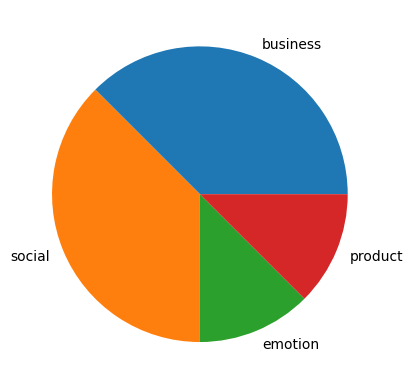

In [195]:
import matplotlib.pyplot as plt


 

plt.pie(flattened_list,labels=topic_counts.index.values.tolist() )
plt.show()